In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

# PART1

### Import dataset

In [2]:
dataset = pd.read_csv('glass.csv')
dataset = dataset.fillna(dataset.mean())
feature_names = list(dataset.columns[:-1])
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### split the dataset into train/test  (80/20 proportion) 

In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset[dataset.columns[:-1]], dataset['Type'], test_size=0.2, random_state=0)
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(X_train)
X_testscaled=sc_X.transform(X_test)

In [4]:
param_grid = [
        {
            'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
            'hidden_layer_sizes': [
             (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
             ]
        }
       ]

In [5]:
%%capture --no-display
clf = GridSearchCV(MLPClassifier(), param_grid, cv=3,
                           scoring='accuracy')
# fit model
clf.fit(X_trainscaled,y_train)

GridSearchCV(cv=3, estimator=MLPClassifier(),
             param_grid=[{'activation': ['identity', 'logistic', 'tanh',
                                         'relu'],
                          'hidden_layer_sizes': [(1,), (2,), (3,), (4,), (5,),
                                                 (6,), (7,), (8,), (9,), (10,),
                                                 (11,), (12,), (13,), (14,),
                                                 (15,), (16,), (17,), (18,),
                                                 (19,), (20,), (21,)],
                          'solver': ['lbfgs', 'sgd', 'adam']}],
             scoring='accuracy')

In [6]:
print('Best params:',clf.best_params_)
print("Test set: ", clf.score(X_testscaled,y_test))

Best params: {'activation': 'relu', 'hidden_layer_sizes': (9,), 'solver': 'lbfgs'}
Test set:  0.6046511627906976


# Pt2

### CNN

In [13]:
import re
import random
import numpy as np
import pandas as pd

from tensorflow import keras

from skimage.io import imread, imshow

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


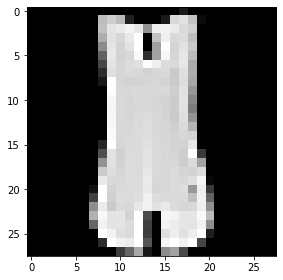

In [15]:
imshow(x_train[4])

In [16]:
inputs = keras.Input(shape=(28, 28, 1))

x = keras.layers.Conv2D(64, 3, activation="relu")(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Flatten()(x)

outputs = keras.layers.Dense(10)(x)

cnn_model = keras.Model(inputs=inputs, outputs=outputs, name="cnn_model")

In [17]:
cnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

In [18]:
cnn_model.fit(x_train, y_train, batch_size=256, epochs=5, validation_split=0.2)

Epoch 1/5
188/188 [==============================] - 79s 415ms/step - loss: 2.5443 - accuracy: 0.7585 - val_loss: 0.6382 - val_accuracy: 0.8532
Epoch 2/5
188/188 [==============================] - 80s 423ms/step - loss: 0.5035 - accuracy: 0.8905 - val_loss: 0.5545 - val_accuracy: 0.8762
Epoch 3/5
188/188 [==============================] - 75s 401ms/step - loss: 0.2911 - accuracy: 0.9220 - val_loss: 0.5962 - val_accuracy: 0.8784
Epoch 4/5
188/188 [==============================] - 80s 424ms/step - loss: 0.2047 - accuracy: 0.9404 - val_loss: 0.6065 - val_accuracy: 0.8802
Epoch 5/5
188/188 [==============================] - 90s 479ms/step - loss: 0.1545 - accuracy: 0.9516 - val_loss: 0.6563 - val_accuracy: 0.8813


In [19]:
test_scores = cnn_model.evaluate(x_test, y_test, verbose=2)

print(f"Test accuracy: { test_scores[1]} | Test loss: {test_scores[0]}")

313/313 - 3s - loss: 0.7069 - accuracy: 0.8732
Test accuracy: 0.873199999332428 | Test loss: 0.7069274187088013


# PART3

### RNN

In [21]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import  load_files
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rtmk_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
movie_data = load_files("com")
data, target = movie_data.data, movie_data.target

In [28]:
df = pd.DataFrame()
df['review'],df['label'] = data,target
df['review'] = df['review'].str.decode('utf8');

In [29]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile(b'[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile(b'[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [30]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() 
    text = REPLACE_BY_SPACE_RE.sub(' ', text) 
    text = BAD_SYMBOLS_RE.sub('', text) 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) 
    return text
df['review'] = df['review'].apply(clean_text)

In [31]:
MAX_NB_WORDS = 50000
MAX_SEQUENCE_LENGTH = 250
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['review'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 46980 unique tokens.


In [32]:
X = tokenizer.texts_to_sequences(df['review'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (2000, 250)


In [33]:
Y = pd.get_dummies(df['label']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (2000, 2)


In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(1800, 250) (1800, 2)
(200, 250) (200, 2)


In [35]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])


Epoch 1/10
26/26 [==============================] - 35s 1s/step - loss: 0.6926 - accuracy: 0.5060 - val_loss: 0.6834 - val_accuracy: 0.6389
Epoch 2/10
26/26 [==============================] - 29s 1s/step - loss: 0.6007 - accuracy: 0.7860 - val_loss: 0.4459 - val_accuracy: 0.8000
Epoch 3/10
26/26 [==============================] - 27s 1s/step - loss: 0.1384 - accuracy: 0.9656 - val_loss: 0.4805 - val_accuracy: 0.7889
Epoch 4/10
26/26 [==============================] - 33s 1s/step - loss: 0.0324 - accuracy: 0.9956 - val_loss: 0.5432 - val_accuracy: 0.8222
Epoch 5/10
26/26 [==============================] - 32s 1s/step - loss: 0.0151 - accuracy: 0.9969 - val_loss: 0.5592 - val_accuracy: 0.7778


In [36]:
accuracy = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accuracy[0],accuracy[1]))

7/7 [==============================] - 0s 62ms/step - loss: 0.6972 - accuracy: 0.7650
Test set
  Loss: 0.697
  Accuracy: 0.765


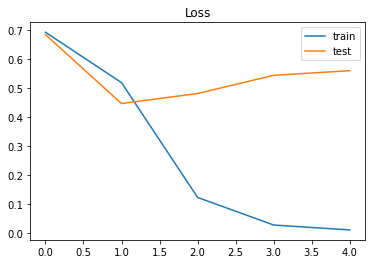

In [37]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

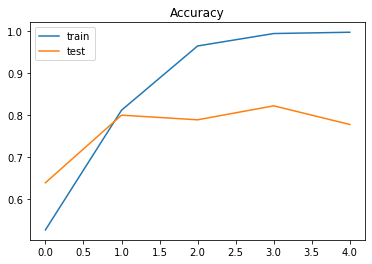

In [38]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();